## Webscrapping WYKOP.PL - Short data analysis

In [3]:
# Handling the data
import pandas as pd
import numpy as np
import datetime

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
wykop_org = pd.read_csv('wykop.csv')
wykop = wykop_org.copy()
wykop.head()

,dislikes,hashtags,likes,nickname,title,views
0,4,"europa,rosja,ukraina,wojna,wydarzenia,ruskimir",45,Kolekcjoner_dusz,"Kolejna wymiana jeńców. Do domu 14 Ukraińców, ...",<1 tys.
1,0,"polska,slask,odpady,afera,kryminalne,wydarzenia",301,Szewczenko,Zamiast neutralizować zakopywali odpady pokopa...,2 tys.
2,0,"europa,niemcy,rosja,nordstream2,ukraina",2449,Szewczenko,Niemcy. Zaginęły dokumenty ws. fundacji klimat...,9.1 tys.
3,12,"swiat,rosja,ukraina,wojna,europa,putin",583,RadioZET,"Rosjanie strzelają do swoich. „Są zmęczeni, be...",9.9 tys.
4,12,"europa,ukraina",617,Vladimir777,"200 tanks, Grads, and missiles: Poland transfe...",11.3 tys.


In [5]:
wykop.dtypes

dislikes     int64
hashtags    object
likes        int64
nickname    object
title       object
views       object
dtype: object

For the purpose of the analysis, in the case of "<1000" impressions we decided to assign the value 1000.

In [6]:
# Change views
wykop['views_new'] = wykop.views.apply(lambda x: x.split(' ')[0])
wykop['views_new'] = wykop['views_new'].str.replace('<',' ')
wykop['views_new'] = wykop['views_new'].astype('float32') * 1000

### Top 5 users

In [7]:
top_5_users = wykop.nickname.value_counts().head(5)
top_5_users

Szu_                85
Szewczenko          66
Kolekcjoner_dusz    32
Bryzoll             16
Mercurius           13
Name: nickname, dtype: int64

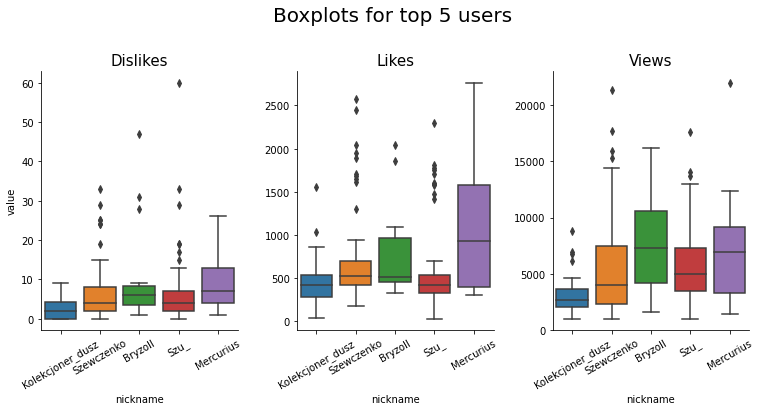

In [8]:
numerical_features = wykop[['dislikes','likes','views_new']].columns
data_comparison = pd.concat([wykop[wykop.nickname.isin(top_5_users.index)]['nickname'], wykop[numerical_features]], axis = 1)
data_comparison = data_comparison.melt(id_vars='nickname')

plot_top_5 = sns.catplot(
    data=data_comparison, x='nickname', y='value',
    col='variable', kind='box', col_wrap=4, height=5, aspect=0.7, sharey=False
)

plot_top_5.fig.subplots_adjust(top=0.8, wspace = 0.3)
plot_top_5.fig.suptitle('Boxplots for top 5 users',ha = 'right', fontsize = 20)
plot_top_5.set_xticklabels(rotation=30)

titles = ['Dislikes','Likes','Views']

for ax,title in zip(plot_top_5.axes.flatten(),titles):
    ax.set_title(title, fontsize = 15)

plt.show()

In [9]:
wykop[wykop.nickname.isin(top_5_users.index)]['nickname']

0      Kolekcjoner_dusz
1            Szewczenko
2            Szewczenko
6               Bryzoll
7            Szewczenko
             ...       
608          Szewczenko
611    Kolekcjoner_dusz
612           Mercurius
617          Szewczenko
625          Szewczenko
Name: nickname, Length: 212, dtype: object

### Top 5 most likeable articles

In [10]:
wykop.sort_values(by = 'likes', ascending=False).head(5)

,dislikes,hashtags,likes,nickname,title,views,views_new
437,1,"polska,nauczyciele,szkola,edukacja",3489,PanSwiatla,"Bójka w szkole. Nauczyciel został zawieszony, ...",22.6 tys.,22600.0
125,32,"johnnydepp,kino,film,amberheard,swiat,prawo",3380,Castellano,Amber Heard zachęcała Johnny'ego Deppa by prze...,38 tys.,38000.0
112,12,"polska,rosja,ekonomia",3330,arq007,Oficjalnie: Gazprom wstrzymał dostawy gazu do ...,48.8 tys.,48800.0
627,76,"polska,ukraina,wojna",3052,Xeyo,... kacapskie auta w Berlinie.,27.2 tys.,27200.0
549,48,"swiat,netflix,elonmusk,bekazlewactwa,kultura,r...",2953,Mistborn,"Elon Musk ocenia, że Netflix traci odbiorców p...",26.7 tys.,26700.0


### Top 5 most unlikeable articles

In [11]:
wykop.sort_values(by = 'dislikes',ascending=False).head(5)

,dislikes,hashtags,likes,nickname,title,views,views_new
620,295,"polska,bekazpodludzi,teoriespiskowe,trolling,b...",949,Wiktor1975,"Trolle zdemaskowane. Wykorzystują Brauna, Cej...",8.9 tys.,8900.0
109,210,"polska,musk,twitter,heheszki,bekazlewactwa,4ko...",984,wojna,"""Czarny dzień dla internetu"". Aktywista LGBT n...",17.9 tys.,17900.0
120,198,"rosja,obi",2203,antonikokoszka,OBI wznawia działalność w rosji !!!,7.8 tys.,7800.0
84,180,"twitter,heheszki,4konserwy,bekazlewactwa,bekaz...",908,Kam3l,"Trzask w komentarzach jest niesamowity, Sara G...",33.1 tys.,33100.0
574,157,"polska,historia,wojna,niemcy,rosja",1729,derek_se,"Pakt, o którym musi pamiętać każdy Polak.",10 tys.,10000.0


### Hashtags division

In [12]:
# Define how many additionals columns should we have

def define_number_of_hashtag_cols():
    
    len_max = 0
    
    for i in range(len(wykop.hashtags)):
        temp = len(wykop['hashtags'].str.split(',')[i])
        if temp > len_max:
            len_max = temp
    return len_max

def add_columns(no_of_new_cols):
    
    for i in range(no_of_new_cols):
        wykop[f'hashtag_{i+1}'] = wykop['hashtags'].str.split(',').str[i]
        
    return wykop

add_columns(define_number_of_hashtag_cols()).head() # show first 5 rows

,dislikes,hashtags,likes,nickname,title,views,views_new,hashtag_1,hashtag_2,hashtag_3,hashtag_4,hashtag_5,hashtag_6,hashtag_7
0,4,"europa,rosja,ukraina,wojna,wydarzenia,ruskimir",45,Kolekcjoner_dusz,"Kolejna wymiana jeńców. Do domu 14 Ukraińców, ...",<1 tys.,1000.0,europa,rosja,ukraina,wojna,wydarzenia,ruskimir,NaN
1,0,"polska,slask,odpady,afera,kryminalne,wydarzenia",301,Szewczenko,Zamiast neutralizować zakopywali odpady pokopa...,2 tys.,2000.0,polska,slask,odpady,afera,kryminalne,wydarzenia,NaN
2,0,"europa,niemcy,rosja,nordstream2,ukraina",2449,Szewczenko,Niemcy. Zaginęły dokumenty ws. fundacji klimat...,9.1 tys.,9100.0,europa,niemcy,rosja,nordstream2,ukraina,NaN,NaN
3,12,"swiat,rosja,ukraina,wojna,europa,putin",583,RadioZET,"Rosjanie strzelają do swoich. „Są zmęczeni, be...",9.9 tys.,9900.0,swiat,rosja,ukraina,wojna,europa,putin,NaN
4,12,"europa,ukraina",617,Vladimir777,"200 tanks, Grads, and missiles: Poland transfe...",11.3 tys.,11300.0,europa,ukraina,NaN,NaN,NaN,NaN,NaN


Now, we are going to calculate how many hashtags were used. We know, that one hashtag is a must, but our page can change dynamically. That's why, it is important to store in memory current number of scraped hashtags.

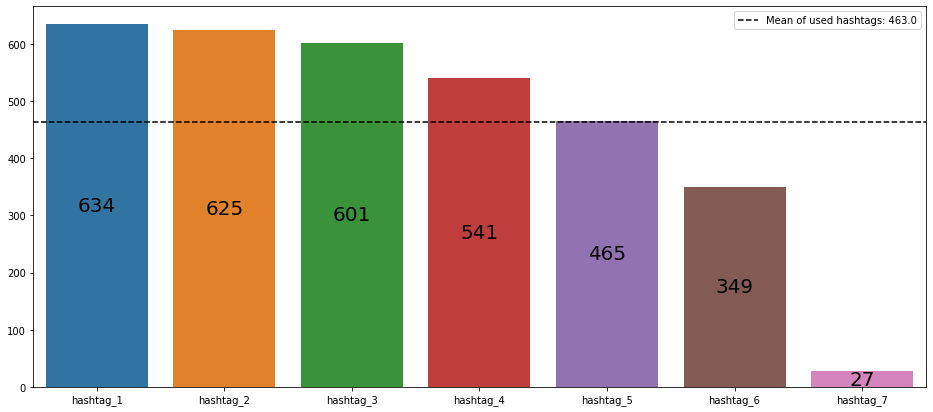

In [13]:
temp = wykop.loc[:, 'hashtag_1':f'hashtag_{define_number_of_hashtag_cols()}'].apply(lambda x: sum(x.notna()))

plt.figure(figsize = (16,7))
ax = sns.barplot(temp.index, temp.values)
plt.axhline(np.mean(temp), 
            color = 'black', 
            linestyle = 'dashed', 
            label=f'Mean of used hashtags: {str(round(np.mean(temp),0))}')
plt.legend(loc='upper right')
for annot in ax.containers:
    ax.bar_label(annot, label_type = "center", size = 20)
plt.show()

Until hashtag_4, we decided to show the 5 most frequently occurring words

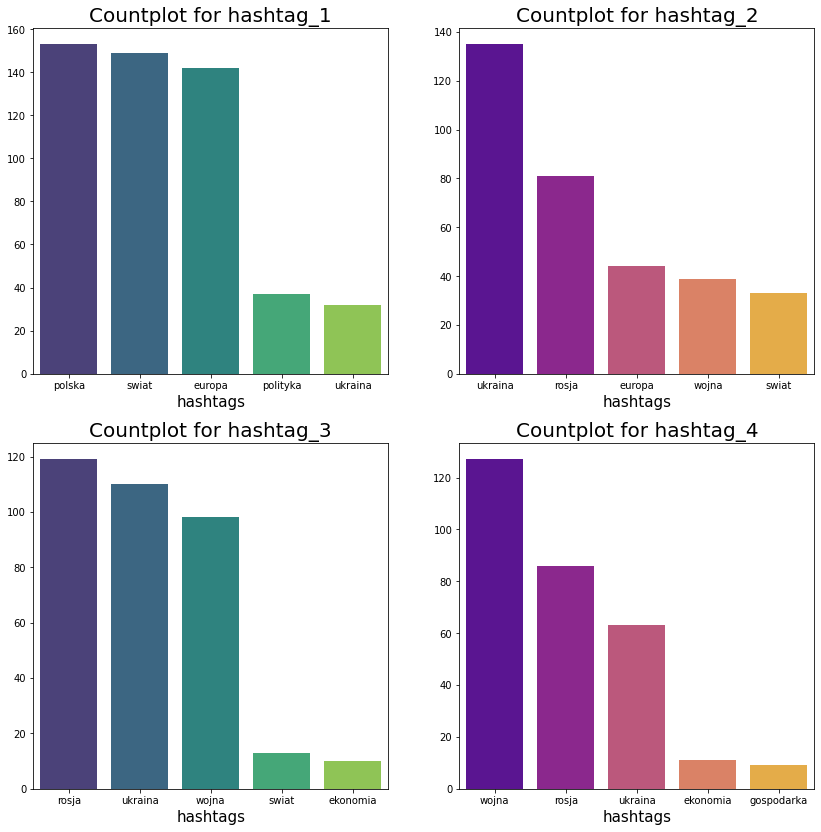

In [29]:
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*7, n_rows*7))
columns = wykop.loc[:, 'hashtag_1':'hashtag_6'].columns
n_rows = 2
n_cols = 2

for rows in range(0, n_rows):
    for cols in range(0, n_cols):
        
        temp = cols
        ax = axs[rows][cols]
        palette = ['viridis', 'plasma']
        temp_counts = wykop[columns[cols+rows if rows==0 else rows+cols+1]].value_counts().head()
        sns.barplot(temp_counts.index, temp_counts.values, ax=ax, palette = palette[cols])
        ax.set_title('Countplot for {}'.format(columns[cols+rows if rows==0 else rows+cols+1]), fontsize = 20)
        ax.set_xlabel('hashtags', fontsize = 15)

Let's check, if we can obtain something from title section.

In [130]:
check_title = wykop.title.apply(lambda x: x.split(' ')[0]).value_counts().head()
check_title

Rosjanie    14
Rosja       14
W            9
Polska       8
Wojna        6
Name: title, dtype: int64

Unluckily, not at all.

## To do: Conclusions